### `By`

- Nour Mohamed Raafat
- Amgad Mohammed Mohamed   Shalaby
- Amina Mohamed Mohamed Abd Elbaqi

In [ ]:
!pip install qiskit

In [2]:
import numpy as np
import matplotlib.pylab as plt

In [3]:
from qiskit.circuit.library import (
                        XGate, ZGate,
                        YGate, HGate,
                        SGate, SdgGate,
                        RXGate, YGate,
                        ZGate, RZGate,
                        RYGate, RXGate,
                        RZZGate, CXGate)
from qiskit.visualization import array_to_latex

# generate_random_data

## Step 1
### 1.1 Function Definition:

####The "generate_random_data" function , takes **two inputs**, m and n, representing the number of rows and columns, respectively. It returns a tuple containing a NumPy array of random data and a NumPy array of random labels.


### 1.2 Shape

####"Output:"

#### A tuple containing:
#### A NumPy array containing the random data.
#### Shape of Data Output: (m, n)
#### The random data is represented as a 2D array with m rows and n columns.
#### A NumPy array containing the random labels.
#### Shape of Labels Output: (m,)
#### The random labels are represented as a 1D array with m elements.



## 1.3 Finally Explanation:

#### The function generates random data and labels for a binary classification problem. The data array has m rows and n columns, while the labels array has m elements.


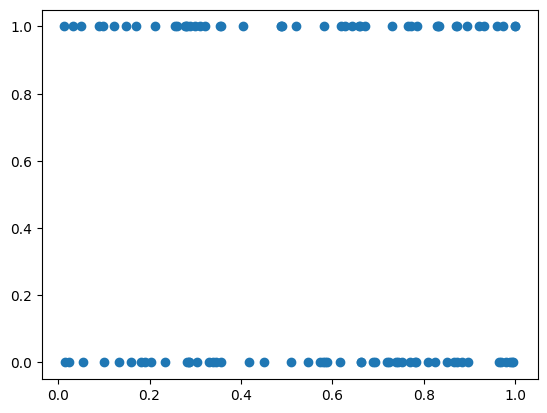

In [20]:
def generate_random_data(m: int  , n:int)->np.array:
  """
  Generates a NumPy array of random data with one column (m rows).

  Args:
      m: The number of rows in the data array.

  Returns:
      A NumPy array containing the random data.
  """
  # Generate random values between 0 and 1
  data =np.random.rand(m, n)
  lables= np.random.choice([0, 1], size=m)
  return data , lables
np.random.seed(211)
m = 100
n=1

data , lables = generate_random_data(m,n)

plt.scatter(data ,lables);

# ground state

## Step 2
### 2.1 Function Definition:

#### The "ground_state" function , takes **no inputs** and returns a 2D NumPy array representing the ground state.

### 2.2 Shape
####"Output:"

#### It returns a 2D NumPy array representing the ground state.
#### Shape of Output: (2, 1)
#### The ground state is represented as a column vector(Ket) with two elements: |0> = [1, 0].

### 2.3 Finally Explanation:

####This function returns a fixed representation of the ground state in quantum computing, where the first element denotes the probability amplitude of state |0> and the second element denotes the probability amplitude of state |1>.


In [21]:
def ground_state() -> np.array:
  """
  Returns a NumPy array representing the ground state (|0> state).

  Returns:
      A 2D  NumPy array representing the ground state.
  """
  ground_state = np.array([[1], [0]])
  return  ground_state

# initialize centroids

## Step 3
### 3.1 Function Definition:

#### The initialize_centroids function , takes two inputs: data, a NumPy array containing classical data points, and k, the number of clusters. It returns a NumPy array containing the initial centroids.

### 3.2 Shape
#### "Input:"

#### data: A NumPy array containing classical data points, Shape of Input: (m, n)
#### The input data is represented as a 2D array with m rows and n columns, where each row represents a data point, k: The number of clusters.

#### "Output:"

#### A NumPy array containing the initial centroids, Shape of Output: (k, n)
#### The centroids are represented as a 2D array with k rows and n columns, where each row represents a centroid.

### 3.3 Finally Explanation:

#### This function randomly selects k data points from the input data to initialize the centroids. The resulting centroids array has k rows (one for each centroid) and the same number of columns as the input data (assuming each data point has the same dimensionality).

In [109]:
def initialize_centroids(data:np.array, k:int )-> np.array:
  """
  Randomly initializes k centroids from the data points.

  Args:
      data: A NumPy array containing the classical data points.
      k: The number of clusters .

  Returns:
      A NumPy array containing the initial centroids.
  """
  idx = np.random.choice(len(data), k, replace=False)
  return data[idx]

k = 2  # Number of cluster

init_cent = initialize_centroids(data, k )
print("init_cent : ",init_cent)

init_cent :  [[0.78533162]
 [0.66354382]]


# encode data

## Step 4
### 3.1 Function Definition:

#### The encode_data function , takes two inputs: data, a NumPy array representing a single data point, and ground_state, a NumPy array representing the initial quantum state. It returns a NumPy array representing the encoded quantum state.

### 4.2 Shape
#### "Input:"

####data: A NumPy array representing a single data point,Shape of Input: (n,)
#### The input data is represented as a 1D array with n elements.
####ground_state: A NumPy array representing the initial quantum state.
####Shape of Input: (2, 1)
####The ground state is represented as a column vector with two elements.

#### "Output:"

####A NumPy array representing the encoded quantum state,Shape of Output: (m, 2)
####The encoded quantum states are represented as a 2D array with m rows and 2 columns, where each row represents an encoded quantum state.

### 4.3 Finally Explanation:

####The function encodes each data point into a quantum state using a rotation gate (RX) and the provided initial ground state. It then reshapes the resulting array to have m rows and 2 columns, where m is the number of data points.

In [23]:
def encode_data(data: np.array, ground_state: np.array) -> np.array:
  """
  Encodes classical data points into quantum states using an RXGate.

  Args:
    data ( np.array): This is a NumPy array containing the classical data points to be encoded.
    ground_state (np.array): This is a NumPy array representing the initial quantum state that will be used for encoding.

 Returns:
     evolved_states ( np.array): This is a NumPy array containing the encoded quantum states.
     The shape of this array will be the same as the number of data points in the data input (number of rows)
      and will have 2 columns (representing the complex amplitudes of the quantum state).
     Each row in the output array corresponds to the encoded quantum state for a particular classical data point from the input.
  """

  evolved_states = []

  for angle in data :
    RX = RXGate(angle[0]).to_matrix()
    evolved_state = RX @ ground_state
    evolved_states.append(evolved_state)

  evolved_states = np.array(evolved_states).reshape((-1, 2))

  return evolved_states


- example

In [24]:
encode_data(data , ground_state()).shape

(100, 2)

In [25]:
# encode init centroid
encode_data( init_cent , ground_state() ).shape

(2, 2)

The resulting encoded state will also be a 2-element complex array, where:
- The first element represents the complex amplitude for the |0> state after the RXGate operation.
- The second element represents the complex amplitude for the |1> state after the RXGate operation.

- The complex amplitudes provide information about the probabilities of finding the system in the |0> or |1> state after measurement.

In [26]:
encode_data(data , ground_state())[:3]

array([[0.92464878+0.j        , 0.        -0.380821j  ],
       [0.94059616+0.j        , 0.        -0.33952742j],
       [0.88475443+0.j        , 0.        -0.4660575j ]])

# Fidelity function

**Fidelity :** can refer to any measure of similarity between two things. This can include quantum states (statevectors or density matrices), quantum gate operations (unitary matrices), or more general quantum channels. In all cases, it is a number between 0 (as different as possible) to 1 (the same object)

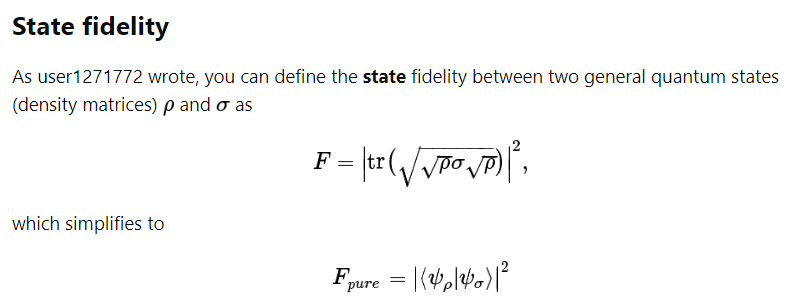

[Quantum Computing](https://quantumcomputing.stackexchange.com/questions/27690/what-is-fidelity-in-quantum-computing

#### numpy.vdot(a, b)

Return the dot product of two vectors.

The vdot(a, b) function handles complex numbers differently than dot(a, b). If the first argument is complex the complex conjugate of the first argument is used for the calculation of the dot product.

- Returns:

    Dot product of a and b. Can be an int, float, or complex depending on the types of a and b.

In [27]:
def fedality(a:np.array , b :np.array )-> float:
    """
    Calculates the fidelity between two quantum states.

    Args:
      a (np.array): The first quantum state vector.
      b (np.array): The second quantum state vector.

    Returns:
      float: The fidelity value between the two states.
    """
    # Calculate inner product
    inner_product = np.vdot(a, b)
    # Square absolute value for fidelity
    fidelity = np.abs(inner_product) ** 2

    return fidelity

In [28]:
# fedality between frist datapoint and first centroid
fedality( encode_data(data , ground_state())[:1] , encode_data( init_cent , ground_state() )[:1] )

0.9908159320996159

In [29]:
# fedality between frist datapoint and 2 centroid
fedality( encode_data(data , ground_state())[:1] , encode_data( init_cent , ground_state() )[1:2] )

0.9920677262502707

# find Closest Centroids

## Step 6
### 6.1 Function Definition:

#### The findClosestCentroids function ,two inputs: enc_data, a NumPy array containing the encoded data points, and enc_centr, a NumPy array containing the encoded centroids. It returns a NumPy array containing the cluster indices (centroid memberships) for each data point.

### 6.2 Shape
#### "Input:"

#### enc_data: A NumPy array containing the encoded data points,Shape of Input: (m, n)
#### The encoded data points are represented as a 2D array with m rows and n columns, where each row represents an encoded data point.
####enc_centr: A NumPy array containing the encoded centroids, Shape of Input: (k, n)
#### The encoded centroids are represented as a 2D array with k rows and n columns, where each row represents an encoded centroid.

#### "Output:"

####A NumPy array containing the cluster indices (centroid memberships) for each data point.
####Shape of Output: (m,)
####The output array is a 1D array with m elements, where each element represents the index of the closest centroid for the corresponding data point.

### 6.3 Finally Explanation:

####The function iterates through each encoded data point and computes the fidelity between that data point and each centroid. It then finds the index of the centroid with the maximum fidelity for each data point, indicating the closest centroid. Finally, it returns an array containing these indices as centroid memberships for each data point.

In [30]:
def findClosestCentroids(enc_data: np.array, enc_centr: np.array) -> np.array:
  """
  Computes the centroid memberships for every encoded data point.

  Args:
      enc_data (np.array): A NumPy array containing the encoded data points.
      enc_centr (np.array): A NumPy array containing the encoded centroids.

  Returns:
      np.array: A NumPy array containing the cluster indices (centroid memberships)
                for each data point.
  """

  closest_centroids = []
  for data_point in enc_data:
    fidelities = []
    for centroid in enc_centr:
      fidelity = fedality(data_point, centroid)  # Use fidelity function
      fidelities.append(fidelity)
    closest_centroids.append(np.argmax(fidelities))  # Find max fidelity index

  return np.array(closest_centroids)


In [31]:
lable=findClosestCentroids(encode_data(data , ground_state()), encode_data( init_cent , ground_state() ))

In [32]:
lable

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# update centroid

In [33]:
encode_data(data , ground_state()).shape

(100, 2)

## Step 7
### 7.1 Function Definition:

#### The computeCentroids function , takes three inputs: enc_data, a NumPy array containing the encoded data points, idx, a NumPy array containing the cluster assignments, and K, an integer representing the number of centroids. It returns a NumPy array containing the centroid values computed from the features of the data points.
### 7.2 Shape
####"input:"

####enc_data: A NumPy array containing the encoded data points,Shape of Input: (m, n)
####The encoded data points are represented as a 2D array with m rows and n columns, where each row represents an encoded data point.
#### idx: A NumPy array containing the cluster assignments,Shape of Input: (m,)
####The cluster assignments are represented as a 1D array with m elements, where each element represents the index of the assigned centroid for the corresponding data point.
####K: An integer representing the number of centroids.

####"Output:"

####A NumPy array containing the centroid values computed from the features of the data points,Shape of Output: (K, n)
####The output array is a 2D array with K rows and n columns, where each row represents a centroid and each column represents a feature.

### 7.3 Finally Explanation:

####The function iterates through each centroid and computes the mean of the data points assigned to that centroid. It then appends the computed mean to the centroids list. Finally, it returns an array containing the centroids computed from the features of the data points.

In [70]:
def computeCentroids(enc_data: np.array, idx: np.array, K: int) -> np.array:
    """
    Returns the new centroids by computing the means of the data points
    assigned to each centroid.

    Args:
        enc_data (np.array): Encoded data points containing features and target.
        idx (np.array): Cluster assignments.
        K (int): Number of centroids.

    Returns:
        np.array: Centroid values computed from the features of the data points.
    """


    centroids = []
    for i in range(K):

        cluster_data = enc_data[idx  == i]
        centroid_mean = np.mean(cluster_data, axis=0)
        centroids.append(centroid_mean)

    return np.array(centroids)

# K_means

## Step 8
### 8.1 Function Definition:

#### The K_means_Quantum_clustering function , takes two inputs: data, a NumPy array containing the classical data points, and k, an integer representing the number of clusters to form. It returns a tuple containing the cluster assignments (indices) for each data point, the centroids of the clusters, and the number of iterations performed.

### 8.2 Shape
####"Input:"

####data: A NumPy array containing the classical data points,Shape of Input: (m, n)
####The classical data points are represented as a 2D array with m rows and n columns, where each row represents a data point.
#### k: An integer representing the number of clusters to form.
####"Output:"

####A tuple containing:
####A NumPy array containing the cluster assignments (indices) for each data point,Shape of Output: (m,)
####The output array is a 1D array with m elements, where each element represents the index of the assigned cluster for the corresponding data point.
####A NumPy array containing the centroids of the clusters,Shape of Output: (k, n)
####The output array is a 2D array with k rows and n columns, where each row represents a centroid and each column represents a feature.
####An integer representing the number of iterations performed during the clustering process.

### 8.3 Finally Explanation:

####The function performs the main loop of the K-means clustering algorithm. It encodes the classical data points into quantum states, initializes centroids using quantum encoding, and iteratively assigns data points to the nearest centroids while updating the centroids' positions. The process continues until convergence is achieved, when the centroids no longer change significantly between iterations. Finally, it returns the cluster assignments, centroids, and the number of iterations performed

In [110]:
def K_means_Quantum_clustering(data: np.array, k: int  ) -> np.array:
    """
    Performs K-means clustering on classical data points using quantum state encoding.

    Args:
        data: A NumPy array containing the classical data points.
        k: The number of clusters to form.

    Returns:
        A NumPy array containing the cluster assignments (indices) for each data point.
    """

    # Main K-means loop
    enc_data = encode_data(data, ground_state())
    enc_centr = initialize_centroids(enc_data, k)
    converged = False
    i =0
    while not converged:
        old_centr = enc_centr
        idx = findClosestCentroids(enc_data, enc_centr)
        enc_centr = computeCentroids(enc_data, idx, k)
        converged = np.all(enc_centr == old_centr)
        i+=1

    return idx  , enc_centr ,i


In [111]:
data[:3]

array([[0.78136808],
       [0.69282886],
       [0.96965897]])

In [112]:
idx , enc_centr , i  = K_means_Quantum_clustering( data , 2)

In [113]:
i

5

In [114]:
idx

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [115]:
enc_centr

array([[0.98984035+0.j        , 0.        -0.12489481j],
       [0.92219354+0.j        , 0.        -0.38051558j]])

# visualisation

In [119]:
import pandas as pd
# Create a DataFrame from data and labels
df = pd.DataFrame({'Data': data.flatten(), 'Label': lables, 'Cluster': idx})

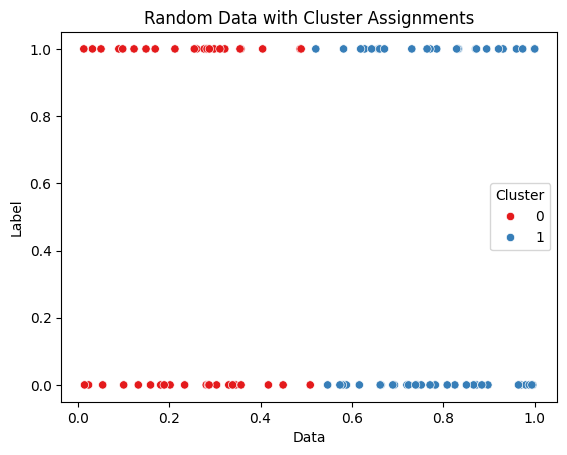

In [124]:
# Plot the data with colors based on cluster assignments using Seaborn
sns.scatterplot(data=df, x='Data', y='Label', hue='Cluster', palette='Set1')
plt.xlabel('Data')
plt.ylabel('Label')
plt.title('Random Data with Cluster Assignments')
plt.show()